# Module 1: Statistics for Genomics
Based on: [Computational Genomics Chapter 3](http://compgenomr.github.io/book/stats.html) by Altuna Alkalin (2020)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import pandas as pd
from scipy.stats import t
from statsmodels.stats.multitest import multipletests

<a id="statistical_distributions"></a>
### 1.1 Statistical distributions

##### 1.1.1 Central Tendency

In [4]:
# Create sample
np.random.seed(100)
mid = 6
sd = 0.7
sample_size = 20
x = np.random.uniform(low=mid-sd, high=mid+sd, size=sample_size)
x_axis = np.linspace(0.5-mid, len(x)-mid, len(x))

Mean: $\overline{X} = \sum^n_{i=1} \frac{x_i}{n}$

In [5]:
mean = np.mean(x)
print('mean =', mean)

mean = 5.936456163506626


In [6]:
median = np.median(x)
print('median =', median)

median = 5.79202088309005


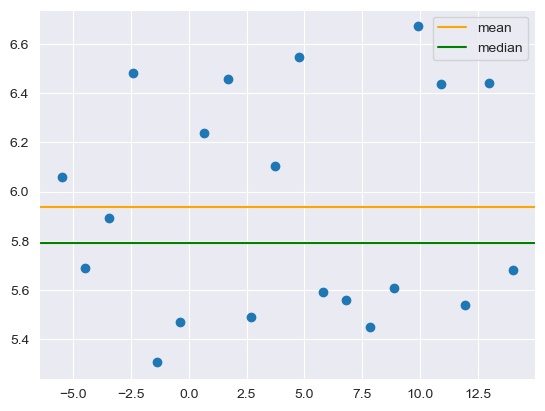

In [7]:
# Graphical illustration
plt.scatter(x_axis, x)
plt.axhline(mean, c='orange', label='mean')
plt.axhline(median, c='green', label='median')
plt.legend()
plt.show()

##### 1.1.2 Spread

Variance: $s^2 = \sum_{i=1}^n \frac{(x_i-\overline{X})^2}{n-1}$

In [8]:
variance = np.var(x)
print('variance =', variance)

variance = 0.19103954531718909


Standard deviation: $s = \sqrt{s^2} = \sqrt{\sum_{i=1}^n \frac{(x_i-\overline{X})^2}{n-1}}$

In [9]:
standard_deviation = np.std(x)
print('variance =', standard_deviation)

variance = 0.43708070801305


In [10]:
# Inter Quartile Range (IQR)
iqr = sc.stats.iqr(x)
print('IQR =', iqr)
quantile_25 = np.quantile(x, 0.25)
quantile_75 = np.quantile(x, 0.75)

IQR = 0.8831719836138472


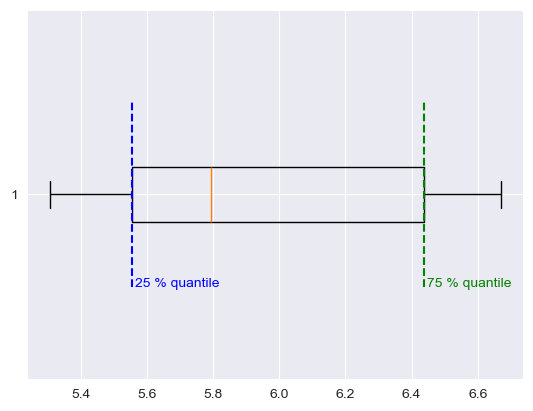

In [11]:
plt.boxplot(x, vert=0)
plt.axvline(quantile_25, 0.25, 0.75, c='blue', ls='--')
plt.axvline(quantile_75, 0.25, 0.75, c='green', ls='--')
plt.text(quantile_25+0.01, 0.75, '25 % quantile', c='blue')
plt.text(quantile_75+0.01, 0.75, '75 % quantile', c='green')
plt.show()

##### 1.1.3 Frequently used statistical distributions 

Normal distribution: $P(x) = \frac{1}{\sigma \sqrt{2 \pi}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}$

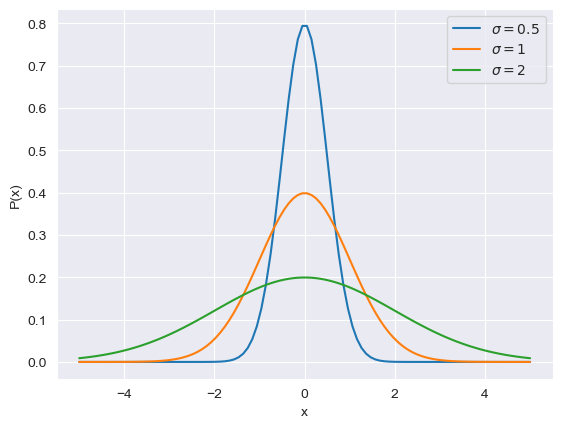

In [12]:
def normal_distribution(x, mu=0, sigma=1):
    return 1/(sigma * np.sqrt(2*np.pi))*np.exp(-(x-mu)**2/(2*sigma**2))

x_axis = np.linspace(-5, 5, 100)
plt.plot(x_axis, normal_distribution(x_axis, sigma=0.5), label='$\sigma=0.5$')
plt.plot(x_axis, normal_distribution(x_axis, sigma=1), label='$\sigma=1$')
plt.plot(x_axis, normal_distribution(x_axis, sigma=2), label='$\sigma=2$')
plt.legend()
plt.xlabel('x')
plt.ylabel('P(x)')
plt.show()

Z-score: $Z = \frac{\overline{X}-\mu}{\sigma/\sqrt{n}}$

### 1.2 Hypothesis testing

1. Find hypothesis: $H_0$: no difference between the samples & $H_1$: difference between samples exists
2. Decide on statistic test
3. Calculate statistic
4. Compare statistic to reference value to establish significance (P-value)
5. Based on P-value -> reject or not reject $H_0$

##### 1.2.1 Randomization-based testing for difference of the means

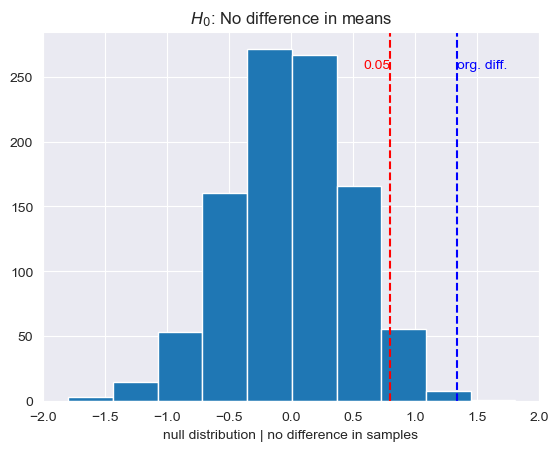

In [13]:
# Generate data
np.random.seed(21)
gene1 = np.random.normal(4, 2, 30)
gene2 = np.random.normal(2, 2, 30)
org_diff = np.mean(gene1) - np.mean(gene2)
gene = pd.DataFrame()

# Generate DataFrame
exp = np.concatenate([gene1, gene2])
group = ['test'] * 30 + ['control'] * 30
gene_df = pd.DataFrame({'exp': exp, 'group': group})

# Permutation test: create null distribution by shuffling group labels
n_permutations = 1000
exp_null = []
for _ in range(n_permutations):
    shuffled_group = np.random.permutation(gene_df['group'])
    mean_test = gene_df.loc[shuffled_group == 'test', 'exp'].mean()
    mean_control = gene_df.loc[shuffled_group == 'control', 'exp'].mean()
    exp_null.append(mean_test - mean_control)

# Plotting
plt.hist(np.array(exp_null), bins=10)
plt.xlabel("null distribution | no difference in samples")
plt.title(r"$H_0$: No difference in means")
plt.xlim(-2, 2)

# Add quantile and observed difference lines
q_95 = np.quantile(exp_null, 0.95)
plt.axvline(q_95, color='red', linestyle='--')
plt.axvline(org_diff, color='blue', linestyle='--')

# Add text annotations
plt.text(q_95, plt.ylim()[1] * 0.9, "0.05", color='red', ha='right') # P-value
plt.text(org_diff, plt.ylim()[1] * 0.9, "org. diff.", color='blue', ha='left')

plt.show()

##### 1.2.2 Using t-test for difference of the means between two samples

t-score: $t = \frac{\overline{X}_1-\overline{X}_2}{s_{X_1, X_2} \sqrt{\frac{1}{n_1}+\frac{1}{n_2}}$, where $s_{X_1, X_2} = \sqrt{\frac{(n_1-1)s^2_{X_1} + (n_2-1)s^2_{X_2}}{n_1+n_2-2}}$

In [14]:
t_stat, p_value = sc.stats.ttest_ind(gene1, gene2, equal_var=True)
print('t-statistic =', t_stat)
print('P-value =', p_value)

t-statistic = 2.742595334039363
P-value = 0.008094464286179178


Welch's test (not assuming equal variances): $t = \frac{\overline{X}_1-\overline{X}_2}{s_{\overline{X}_1-\overline{X}_2}}$, where $s_{\overline{X}_1-\overline{X}_2} = \sqrt{\frac{s^2_1}{n_1}+\frac{s^2_2}{n_2}}$

In [15]:
t_stat, p_value = sc.stats.ttest_ind(gene1, gene2)
print('t-statistic =', t_stat)
print('P-value =', p_value)

t-statistic = 2.742595334039363
P-value = 0.008094464286179178


##### 1.2.3 Multiple testing correction

|                                                                    | $H_0$ is TRUE (e.g. gene is NOT differentially expressed) | $H_1$ is TRUE (gene is differentially expressed) |                                                 |
|--------------------------------------------------------------------|-----------------------------------------------------------|--------------------------------------------------|-------------------------------------------------|
| Accept $H_0$ (claim that the gene is NOT differentially expressed) | True Negatives (TN)                                       | False Negatives (FN), type II error              | $m_0$: number of truly null hypothesis          |
| Reject $H_0$ (claim that the gene is differentially expressed)     | False Positives (FP), type I error                        | True Positives (TP)                              | $m-m_0$: number of truly alternative hypothesis |

* Specificity: $Sp = \frac{TP}{FP+TN}$
* Sensitivity: $Sn = \frac{TP}{TP+FP}$
* F-score: $F = \frac{2\cdot Sn\cdot Sp}{Sn+Sp}$

* FDR-adjusted P-value (Benjamin-Hochberg procedure): $\frac{m\cdot p_i}{i}$, where $m$ is the number of tests and $i$ is the rank: estimate of the proportion of false discoveries for a given test
* Q-Value: estimate of the proportion of true null hypotheses from the distribution of raw p-values (“the proportion of significant features that turn out to be false leads.”)

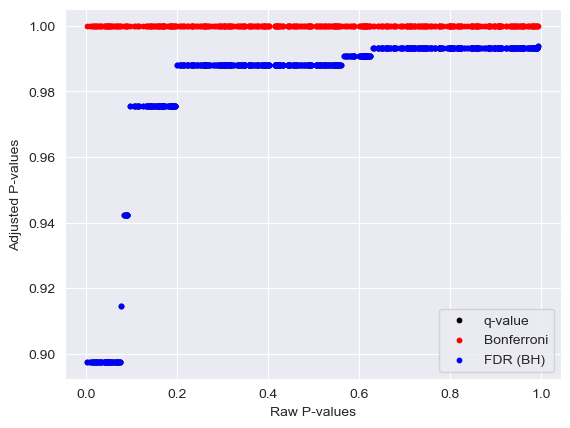

In [16]:
p_values = np.random.uniform(0, 1, 500)

# Compute FDR (Benjamini-Hochberg) adjusted p-values
_, fdr_adj_pval, _, _ = multipletests(p_values, alpha=0.05, method='fdr_bh')

# Compute Bonferroni-adjusted p-values
_, bonf_pval, _, _ = multipletests(p_values, alpha=0.05, method='bonferroni')

# Approximating q-values with the FDR p-values
qvalues = fdr_adj_pval

plt.scatter(p_values, qvalues, color='black', label="q-value", s=10)
plt.scatter(p_values, bonf_pval, color='red', label="Bonferroni", s=10)
plt.scatter(p_values, fdr_adj_pval, color='blue', label="FDR (BH)", s=10)

plt.xlabel("Raw P-values")
plt.ylabel("Adjusted P-values")
plt.legend(loc="best")

plt.show()

##### 1.2.4 Moderated t-tests: Using information from multiple comparisons

* Empirical Bayes methods by Limma software (shrink/moderate toward mean/median of the distribution of variances): $\hat{V_g} = a V_0 + b V_g$, where $V_0$ is the background variability and $V_g$ is the individual variability.  

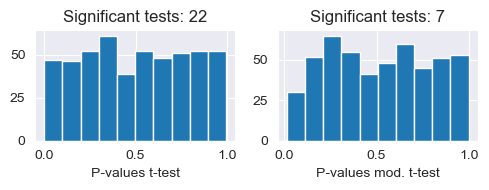

In [17]:
# Set seed for reproducibility
np.random.seed(100)

# Sample data matrix from normal distribution
gset = np.random.normal(200, 70, 3000)
data = np.reshape(gset, (500, 6))  # reshaping into a 500x6 matrix

# Set groups
group1 = [0, 1, 2]
group2 = [3, 4, 5]
n1, n2 = len(group1), len(group2)

# Calculate row-wise means for each group
dx = data[:, group1].mean(axis=1) - data[:, group2].mean(axis=1)

# Calculate pooled variance estimate
row_vars_group1 = np.var(data[:, group1], axis=1, ddof=1)
row_vars_group2 = np.var(data[:, group2], axis=1, ddof=1)
stderr = np.sqrt((row_vars_group1 * (n1 - 1) + row_vars_group2 * (n2 - 1)) / 
                 (n1 + n2 - 2) * (1/n1 + 1/n2))

# Perform shrinking towards the median
mod_stderr = (stderr + np.median(stderr)) / 2

# Calculate t-statistic with moderated variance
t_mod = dx / mod_stderr

# Calculate p-values for moderated t-test
p_mod = 2 * t.cdf(-np.abs(t_mod), df=n1 + n2 - 2)

# Calculate t-statistic without moderated variance
t_stat = dx / stderr

# Calculate p-values for standard t-test
p = 2 * t.cdf(-np.abs(t_stat), df=n1 + n2 - 2)

# Plot histograms
plt.figure(figsize=(5, 2))
plt.subplot(1, 2, 1)
plt.hist(p, bins=10)
plt.xlabel("P-values t-test")
plt.title(f"Significant tests: {np.sum(p < 0.05)}")

plt.subplot(1, 2, 2)
plt.hist(p_mod, bins=10)
plt.xlabel("P-values mod. t-test")
plt.title(f"Significant tests: {np.sum(p_mod < 0.05)}")

plt.tight_layout()
plt.show()

### 1.3 Linear models

* 1D linear model: $\bf{Y} = \beta_0 + \beta_1 \bf{X} + \bf{\epsilon}$, where $\bf{Y}$ resembles the response variable and $\bf{X}$ the explanatory variable and $\epsilon$ is the mean-zero error term. Without the error term: $\bf{Y} \sim \beta_0 + \beta_1 \bf{X}$. Here, we will be fitting a line.
* 2D linear model: $\bf{Y} = \beta_0 + \beta_1 \bf{X_1} + \beta_2 \bf{X_2} + \bf{\epsilon}$, with $\bf{X_2}$ being a second explanatory variable. In this case, we will be fitting a plane.

Matrix notation for linear models:
$\bf{Y} = \beta_0 + \beta_1 \bf{X_1} + \beta_2 \bf{X_2} + ... + \beta_n \bf{X_n} + \bf{\epsilon}$

$\Rightarrow \bf{Y} = \begin{bmatrix} 1 & X_{1,1} & X_{1,2} \\ 1 & X_{2,1} & X_{2,2} \\ 1 & X_{3,1} & X_{3,2} \\ 1 & X_{4,1} & X_{4,2} \end{bmatrix} \begin{bmatrix} \beta_0 \\ \beta_1 \\ \beta_2 \end{bmatrix} + \begin{bmatrix} \epsilon_1 \\ \epsilon_2 \\ \epsilon_3 \\ \epsilon_4 \end{bmatrix}$

$\Rightarrow \bf{Y} = \it{\bf{X}} \bf{\beta} + \bf{\epsilon}$, where $\it{\bf{X}}$ resembles the matrix of response variables.

##### 1.3.1 How to fit a line

###### 1.3.1.1 Loss/Cost function

The cost or loss function approach (sum of squared differences between the predicted $\bf{\hat{Y}}$ values from our model and the original $\bf{Y}$ values): $min\sum(y_i - (\beta_0+\beta_1 x_i))^2$. The optimization procedure tries to find $\beta$ values that minimize this difference between reality and predicted values (thereby trying to minimize squared of sum of $\epsilon_i$ for each data point).
The "gradient descent" algorithm:
1. Pick a random starting point, random $\beta$ values.
2. Take the partial derivatives of the cost function to see which direction is the way to go in the cost function.
3. Take a step toward the direction that minimizes the cost function.
4. Repeat step 2,3 until convergence.

###### 1.3.1.2 Maximum likelihood function

The approach assumes that a given response variable $y_i$ follows a normal distribution with mean $\beta_0+\beta_1 x_i$ and variance $s^2$ and shall be optimized to maximize the probability of observing all the response variables in the dataset given the explanatory variables:
$P(y_i) = \frac{1}{s\sqrt{2 \pi}}e^{-\frac{1}{2}(\frac{y_i-(\beta_0+\beta_1 x_i)}{s})^2}$, where variance is constant and $s^2 = \frac{\sum \epsilon_i}{n-2}$ is an unbiased estimation for population variance.
The likelihood function $L$ for linear regression is multiplication of $P(y_i)$ for all data points:
$$L = P(y_1)P(y_2)P(y_3)...P(y_n) = \prod_{i=1}^n P_i$$
Simplified by assumption of normal distribution and taking logs (since adding is easier than multiplication):
$$\Rightarrow ln(L) = -n ln(s\sqrt{2\pi})-\frac{1}{2s^2} \sum_{i=1}^n(y_i-(\beta_0+\beta_1 x_i))^2$$

###### 1.3.1.3 Linear algebra and closed-form solution to linear regression

Minimize the cost function explicitly by taking its derivative with respect to $\beta$'s and setting them to zero ("ordinary least squares"). Since $\epsilon_i = Y_i - (\beta_0 + \beta_1 x_i)$:
$$\sum \epsilon_i^2 = \epsilon^T \epsilon = (Y - \beta X)^T (Y-\beta X) = Y^T Y - 2 \beta^T Y + \beta^T X^T X \beta$$
After taking the derivative of $\epsilon^T \epsilon$ with respect to $\beta$ and equalizing that to zero we arrive at the estimated values for $\beta$, $\hat{\beta}$:
$$\hat{\beta} = (X^T X)^{-1} X^T Y$$
If we solve the inverse of $X^T X$ we arrive at the values for $\hat{\beta_0}$ and $\hat{\beta_1}$:
$$\hat{\beta_1} = \frac{\sum (x_i-\overline{X})(y_i-\overline{Y})}{\sum(x_i-\overline{X})^2}$$
$$\hat{\beta_0} = \overline{Y}-\hat{\beta_1}\overline{X}$$

###### 1.3.1.4 Fitting lines

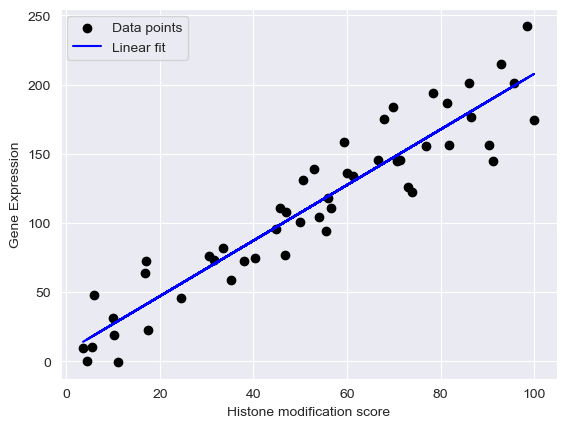

In [20]:
import statsmodels.api as sm

np.random.seed(32)

# Generate 50 X values between 1 and 100
x = np.random.uniform(1, 100, 50)

# Set b0, b1, and sigma
b0 = 10
b1 = 2
sigma = 20

# Simulate error terms from a normal distribution
eps = np.random.normal(0, sigma, 50)

# Calculate y values from the linear equation with error terms
y = b0 + b1 * x + eps

# Fit the linear model
x_with_const = sm.add_constant(x)  # Add intercept term to x
model = sm.OLS(y, x_with_const).fit()

# Plot the data points
plt.scatter(x, y, color='black', label='Data points')
plt.xlabel("Histone modification score")
plt.ylabel("Gene Expression")

# Plot the linear fit
plt.plot(x, model.predict(x_with_const), color='blue', label='Linear fit')

plt.legend()
plt.show()

##### 1.3.2 How to estimate the error of the coefficients

* Standard error of coefficients: when taking random samples and estimating the model coefficients, their values are normal-like distributed.
* Since we will not be able to do repeated sampling and estimating the standard error for the model coefficients, we can use a statistical theory: assuming the error terms having constant variance and mean zero, we can model the uncertainty in the regression coefficients. Estimates for the standard errors (SE) depend on the estimate of variance of residuals (RSE):
$$s = RSE = \sqrt{\frac{\sum (y_i-(\beta_0+\beta_1 x_i))^2}{n-2} = \sqrt{\frac{\sum \epsilon^2}{n-2}}$$
$$SE(\hat{\beta_1}) = \frac{s}{\sqrt{\sum(x_i-\overline{X})^2}}$$
$$SE(\hat{\beta_0}) = s \sqrt{\frac{1}{n}+\frac{\overline{X}^2}{\sum(x_i - \overline{X})^2}}$$

The standard error estimates can also be used to calculate confidence intervals and test hypotheses:
t-score: $$t = \frac{\hat{\beta_i}-\beta_t est}{SE(\hat{\beta_i})}$$

In [21]:
import statsmodels.api as sm

np.random.seed(32)

# Generate 50 X values between 1 and 100
x = np.random.uniform(1, 100, 50)

# Set b0, b1, and sigma
b0 = 10
b1 = 2
sigma = 20

# Simulate error terms from a normal distribution
eps = np.random.normal(0, sigma, 50)

# Calculate y values from the linear equation with error terms
y = b0 + b1 * x + eps

# Add a constant to x for the intercept term
x_with_const = sm.add_constant(x)

# Fit the linear model
model = sm.OLS(y, x_with_const).fit()

# Summary of the model
print(model.summary())

# Confidence intervals for the coefficients
print("Confidence intervals:")
print(model.conf_int())

# Coefficients of the model
print("Coefficients:")
print(model.params)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     364.4
Date:                Tue, 26 Nov 2024   Prob (F-statistic):           4.65e-24
Time:                        10:11:56   Log-Likelihood:                -222.04
No. Observations:                  50   AIC:                             448.1
Df Residuals:                      48   BIC:                             451.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.7833      6.280      1.080      0.2

##### 1.3.3 Accuracy of the model

* Residual standard error ($RSE$): square-foot of the sum or squared error terms, divided by degrees of freedom $n-p$ (in simple linear regression: $n-2$). It assesses the model fit. The larger the $RSE$, the worse the model is. $RSS$ is "Residual sum of squares":
$$s=RSE=\sqrt{\frac{\sum(y_i-\hat{Y_i})^2}{n-p}}=\sqrt{\frac{RSS}{n-p}}$$

* $R^2$: the $RSS$ of a simpler (worse) model with just the intercept $\beta_0$ (will in the end be equal to $\overline{Y}$) is called "Total Sum of Squares" ($TSS$). A good model will have a low $RSS/TSS$. The closer the $R^2$ value to 1, the better the model. Here, $TSS-RSS$ is analogous to "explained variability".
$$R^2 = 1 - \frac{RSS}{TSS} = \frac{TSS-RSS}{TSS}$$ 

* Correlation coefficient: square root of $R^2$. 
    * Pearson correlation coefficient:
      $$r_{xy} = \frac{cov(X, Y)}{\sigma_x \sigma_y} = \frac{\sum_{i=1}^n(x_i-\overline{x})(y_i-\overline{y})}{\sum_{i=1}^n(x_i-\overline{x})^2\sum_{i=1}^n(y_i-\overline{y})^2}$$

* F-statistic: can answer wheter or not any of the explanatory variables have predictive value (if all explanatory variables are zero): $H_0: \beta_1 = \beta_2 = ... = \beta_p = 0$ and $H_1:$ at least one $\beta_i \neq 0$. Here, we divide "explained variability" by "unexplained variability":
$$F = \frac{(TSS-RSS)/(p-1)}{RSS/(n-p)} = \frac{(TSS-RSS)/(p-1)}{RSE} \sim F(p-1, n-p)$$

##### 1.3.4 Regression with categorical variables

We do not have to include only one type of variable in a model: 

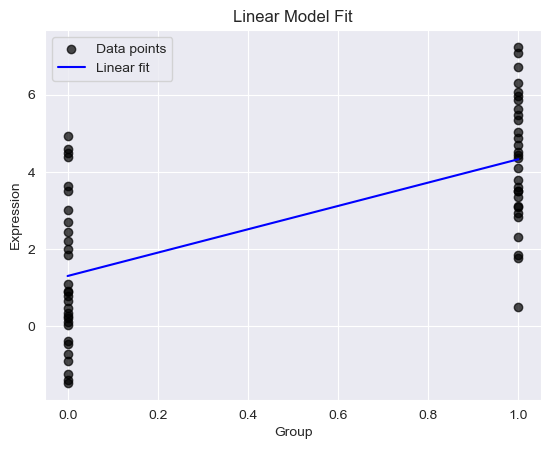

In [22]:
import statsmodels.api as sm

np.random.seed(100)

# Generate data
gene1 = np.random.normal(4, 2, 30)
gene2 = np.random.normal(2, 2, 30)

# Create a DataFrame
gene_df = pd.DataFrame({
    'exp': np.concatenate([gene1, gene2]),
    'group': [1] * 30 + [0] * 30
})

# Fit the linear model
X = sm.add_constant(gene_df['group'])  # Add intercept term
model = sm.OLS(gene_df['exp'], X).fit()

# Summary of the model
#print(model.summary())

# Plot the model (replicating plotModel(mod2) in R)
plt.scatter(gene_df['group'], gene_df['exp'], label="Data points", color='black', alpha=0.7)
plt.plot(gene_df['group'], model.predict(X), label="Linear fit", color='blue')

plt.xlabel("Group")
plt.ylabel("Expression")
plt.title("Linear Model Fit")
plt.legend()
plt.show()

In [23]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Generating the data
gene1 = np.random.normal(4, 2, 30)  
gene2 = np.random.normal(2, 2, 30)

# Create a DataFrame
gene_df = pd.DataFrame({
    'exp': np.concatenate([gene1, gene2, gene2]),
    'group': ['A'] * 30 + ['B'] * 30 + ['C'] * 30
})

# Convert 'group' to categorical and create dummy variables
gene_df['group'] = pd.Categorical(gene_df['group'])
group_dummies = pd.get_dummies(gene_df['group'], drop_first=True)

# Ensure input to OLS is numeric and correctly formatted
X = sm.add_constant(group_dummies)  # Add intercept
y = gene_df['exp']  # Dependent variable

# Fit the linear model
model = sm.OLS(y, X.astype(float)).fit()

# Summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    exp   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.217
Method:                 Least Squares   F-statistic:                     13.36
Date:                Tue, 26 Nov 2024   Prob (F-statistic):           8.68e-06
Time:                        10:11:56   Log-Likelihood:                -195.85
No. Observations:                  90   AIC:                             397.7
Df Residuals:                      87   BIC:                             405.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.7227      0.396      9.402      0.0

##### 1.3.5 Regression pitfalls 

* Non-linearity: prediction accuracy is reduced. In some cases, transforming the data with $log X, \sqrt{X}, X^2$ can resolve the issue.
* Correlation of explanatory variables: leads to multicolinearity. Then SE estimates of the coefficients will be too large. This is usually observed with time-course data.
* Correlation of error-terms: when errors of the response variables are uncorrelated with each other the confidence intervals of the coefficients might be too narrow.
* Non-constant variance of error terms: when the different response variables have the same variance in their errors, regardless of the values of the predictor values. If the errors are not constant, this will result in unreliable estimates in standard errors as the model assumes constant variance. In some cases, transforming the data with $log X, \sqrt{X}$ can resolve the issue.
* Outliers and high leverage points: In some cases, they can be removed from the data for a better fit.

### 1.4 Exercises

##### 1.4.1 How to summarize collections of data points: The idea behind statistical distributions

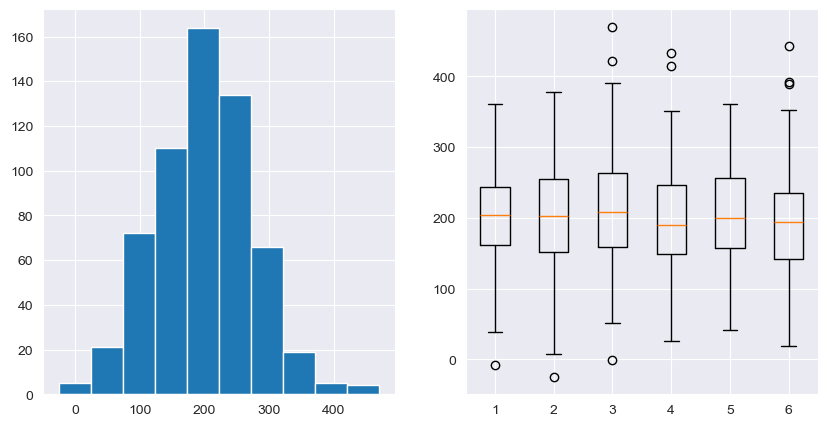

In [24]:
# 1: Calculate the means and variances of the rows of the following simulated data set, and plot the distributions of means and variances using hist() and boxplot() functions.

np.random.seed(100)
data = np.random.normal(loc=200, scale=70, size=600)
data = data.reshape(-1, 6) 

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
ax[0].hist(data.reshape(600, 1))
ax[1].boxplot(data)
plt.show()

In [25]:
# 2: Using the data generated above, calculate the standard deviation of the distribution of the means using the sd() function. Compare that to the expected standard error obtained from the central limit theorem keeping in mind the population parameters were σ = 70 and n = 6. How does the estimate from the random samples change if we simulate more data with data=matrix(rnorm(6000,mean=200,sd=70),ncol=6)?

mean = 200
means = data.mean(axis=0)
sd = np.std(means)
print('n = 600:')
print('standard deviation =', sd)
n = 6
p = 2
sum = 0
for i in range(n):
    sum += (means[i] - mean)**2
rse = np.sqrt(sum/(n-p))
print('residual standard error =', rse)
print('----------')

print('n = 6000:')
np.random.seed(100)
data = np.random.normal(loc=200, scale=70, size=6000)
data = data.reshape(-1, 6) 
mean = 200
means = data.mean(axis=0)
sd = np.std(means)
print('standard deviation =', sd)
n = 6
p = 2
sum = 0
for i in range(n):
    sum += (means[i] - mean)**2
rse = np.sqrt(sum/(n-p))
print('residual standard error =', rse)

n = 600:
standard deviation = 7.414342812844733
residual standard error = 9.093814066240165
----------
n = 6000:
standard deviation = 1.1340680380967283
residual standard error = 1.3896984546445093


2.5th percentile: 0.4666666666666667
97.5th percentile: 0.5913416666666667


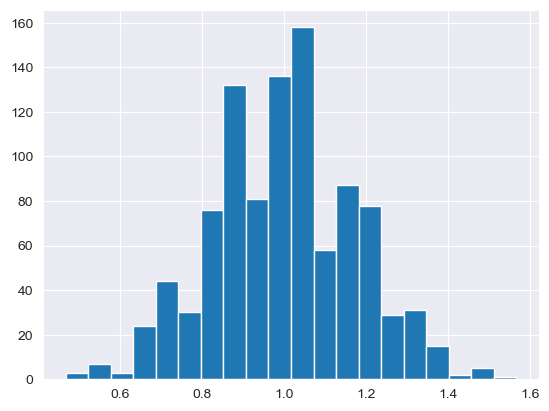

In [26]:
# 3: Simulate 30 random variables using the rpois() function. Do this 1000 times and calculate the mean of each sample. Plot the sampling distributions of the means using a histogram. Get the 2.5th and 97.5th percentiles of the distribution.

np.random.seed(100)
data_poisson = np.random.poisson(lam=1, size=30*1000)
data_poisson = data_poisson.reshape(-1, 1000)
means = data_poisson.mean(axis=0)
plt.hist(means, bins=20)
print('2.5th percentile:', np.percentile(means, 0.025))
print('97.5th percentile:', np.percentile(means, 0.975))

Confidence Interval: $\bf{CI} = \overline{x}\pm t^* \frac{s}{\sqrt{n}}$

In [27]:
# 4: Use the t.test() function to calculate confidence intervals of the mean on the first random sample pois1 simulated from the rpois() function below.

np.random.seed(100)
pois1 = np.random.poisson(lam=5, size=30)

from scipy.stats import t

# Calculate sample mean and standard error of the mean (SEM)
sample_mean = np.mean(pois1)
sample_std = np.std(pois1, ddof=1)  # Use ddof=1 (delta degrees of freedom) for sample standard deviation
n = len(pois1)
sem = sample_std / np.sqrt(n)

# Calculate the critical t-value for a 95% confidence interval
confidence = 0.95
alpha = 1 - confidence
t_critical = t.ppf(1 - alpha / 2, df=n - 1)  # Two-tailed critical value

# Calculate the margin of error
margin_of_error = t_critical * sem

# Calculate confidence interval
ci_lower = sample_mean - margin_of_error
ci_upper = sample_mean + margin_of_error

print(f"Sample Mean: {sample_mean:.2f}")
print(f"95% Confidence Interval: ({ci_lower:.2f}, {ci_upper:.2f})")

Sample Mean: 4.90
95% Confidence Interval: (4.29, 5.51)


In [28]:
# 5: Use the bootstrap confidence interval for the mean on pois1.

def bootstrap_confidence_interval(data, stat_function=np.mean, confidence=0.95, n_resamples=1000):
    bootstrapped_stats = []
    n = len(data)

    # Generate bootstrap resamples and compute the statistic
    for _ in range(n_resamples):
        resample = np.random.choice(data, size=n, replace=True)
        bootstrapped_stats.append(stat_function(resample))

    # Compute the confidence interval
    lower_bound = np.percentile(bootstrapped_stats, (1 - confidence) / 2 * 100)
    upper_bound = np.percentile(bootstrapped_stats, (1 + confidence) / 2 * 100)
    
    return lower_bound, upper_bound

# Calculate a 95% confidence interval for the mean
ci_lower_boot, ci_upper_boot = bootstrap_confidence_interval(pois1, stat_function=np.mean, confidence=0.95)
print(f"95% Bootstrap Confidence Interval: ({ci_lower:.2f}, {ci_upper:.2f})")

95% Bootstrap Confidence Interval: (4.29, 5.51)


In [29]:
# 6: Compare the theoretical confidence interval of the mean from the t.test and the bootstrap confidence interval. Are they similar?
if (abs(1-ci_lower/ci_lower_boot) < 0.03) and (abs(1-ci_upper/ci_upper_boot) < 0.03):
    print('The theoretical and the bootstrap confidence interval are very similar.')
else:
    print('The theoretical and the bootstrap confidence interval are NOT very similar.')

The theoretical and the bootstrap confidence interval are very similar.


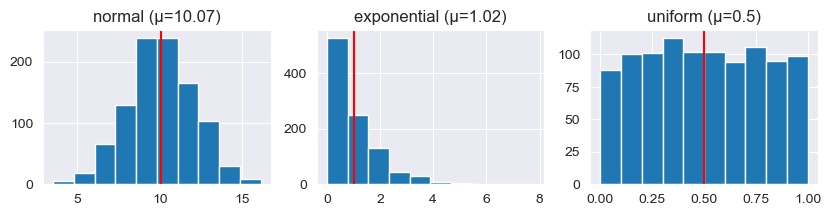

In [30]:
# 7: Try to re-create the following figure, which demonstrates the CLT concept.
# Generate data and means
normal = np.random.normal(10, 2, 1000)
normal_mean = np.mean(normal)
exponential = np.random.exponential(size=1000)
exponential_mean = np.mean(exponential)
uniform = np.random.uniform(0, 1, 1000)
uniform_mean = np.mean(uniform)

# Plot histograms
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 2))
ax[0].hist(normal)
ax[0].axvline(normal_mean, c='red')
ax[0].set_title(f'normal (µ={normal_mean.round(2)})')

ax[1].hist(exponential)
ax[1].axvline(exponential_mean, c='red')
ax[1].set_title(f'exponential (µ={exponential_mean.round(2)})')

ax[2].hist(uniform)
ax[2].axvline(uniform_mean, c='red')
ax[2].set_title(f'uniform (µ={uniform_mean.round(2)})')
plt.show()

##### 1.4.2 How to test for difference in samples

Randomization Test: Observed Difference = 1.409, p-value = 0.0828
T-test: t-statistic = 1.7720, p-value = 0.0817
Wilcoxon Test: w-statistic = 139.0000, p-value = 0.0549


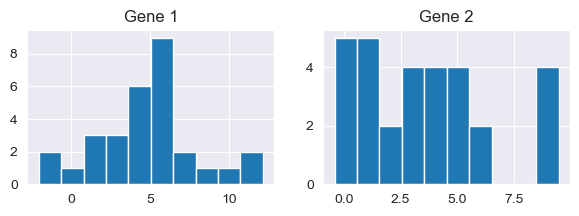

In [31]:
# 1: Test the difference of means of the following simulated genes using the randomization, t-test(), and wilcox.test() functions. Plot the distributions using histograms and boxplots.

np.random.seed(101)
gene1 = np.random.normal(4, 3, 30)
gene2 = np.random.normal(3, 3, 30)

from scipy import stats

# Randomization Test
def randomization_test(group1, group2, n_iterations=10000):
    combined = np.concatenate([group1, group2])
    observed_diff = np.mean(group1) - np.mean(group2)
    
    # Generate null distribution by shuffling
    random_diffs = []
    for _ in range(n_iterations):
        np.random.shuffle(combined)
        new_group1 = combined[:len(group1)]
        new_group2 = combined[len(group1):]
        random_diffs.append(np.mean(new_group1) - np.mean(new_group2))
    
    # Calculate p-value: proportion of random differences greater than or equal to observed difference
    p_value = np.mean(np.abs(random_diffs) >= np.abs(observed_diff))
    
    return observed_diff, p_value

obs_diff, p_val_randomization = randomization_test(gene1, gene2)
print(f"Randomization Test: Observed Difference = {obs_diff:.3f}, p-value = {p_val_randomization:.4f}")

# T-test (independent two-sample T-test)
t_stat, p_val_ttest = stats.ttest_ind(gene1, gene2)
print(f"T-test: t-statistic = {t_stat:.4f}, p-value = {p_val_ttest:.4f}")

# Wilcoxon Signed-Rank Test (non-parametric)
# Note: not ideal for independent data
w_stat, p_val_wilcoxon = stats.wilcoxon(gene1 - gene2)  
print(f"Wilcoxon Test: w-statistic = {w_stat:.4f}, p-value = {p_val_wilcoxon:.4f}")

# Plotting
fig, ax = plt.subplots(ncols=2, figsize=(7, 2))
ax[0].hist(gene1)
ax[0].set_title('Gene 1')
ax[1].hist(gene2)
ax[1].set_title('Gene 2')
plt.show()

Randomization Test: Observed Difference = 3.026, p-value = 0.0000
T-test: t-statistic = 6.5377, p-value = 0.0000
Wilcoxon Test: w-statistic = 22.0000, p-value = 0.0000


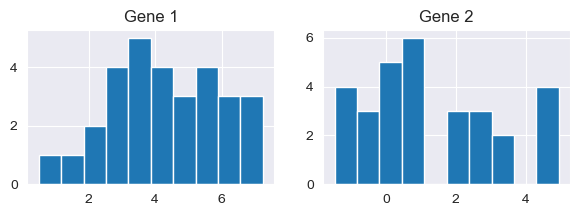

In [32]:
# 2: Test the difference of means of the following simulated genes using the randomization, t-test(), and wilcox.test() functions. Plot the distributions using histograms and boxplots.

np.random.seed(100)
gene1 = np.random.normal(4, 2, 30)
gene2 = np.random.normal(2, 2, 30)

from scipy import stats

# Randomization Test
obs_diff, p_val_randomization = randomization_test(gene1, gene2)
print(f"Randomization Test: Observed Difference = {obs_diff:.3f}, p-value = {p_val_randomization:.4f}")

# T-test (independent two-sample T-test)
t_stat, p_val_ttest = stats.ttest_ind(gene1, gene2)
print(f"T-test: t-statistic = {t_stat:.4f}, p-value = {p_val_ttest:.4f}")

# Wilcoxon Signed-Rank Test (non-parametric)
# Note: not ideal for independent data
w_stat, p_val_wilcoxon = stats.wilcoxon(gene1 - gene2)  
print(f"Wilcoxon Test: w-statistic = {w_stat:.4f}, p-value = {p_val_wilcoxon:.4f}")

# Plotting
fig, ax = plt.subplots(ncols=2, figsize=(7, 2))
ax[0].hist(gene1)
ax[0].set_title('Gene 1')
ax[1].hist(gene2)
ax[1].set_title('Gene 2')
plt.show()

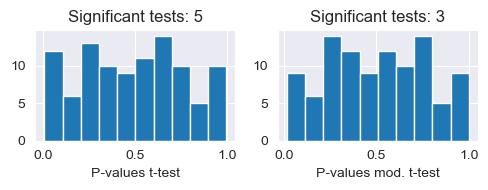

In [33]:
# 3: We need an extra data set for this exercise. Read the gene expression data set as follows: gexpFile=system.file("extdata","geneExpMat.rds",package="compGenomRData") data=readRDS(gexpFile). The data has 100 differentially expressed genes. The first 3 columns are the test samples, and the last 3 are the control samples. Do a t-test for each gene (each row is a gene), and record the p-values. Then, do a moderated t-test, as shown in section “Moderated t-tests” in this chapter, and record the p-values. Make a p-value histogram and compare two approaches in terms of the number of significant tests with the 0.05 threshold. On the p-values use FDR (BH), Bonferroni and q-value adjustment methods. Calculate how many adjusted p-values are below 0.05 for each approach.

np.random.seed(23)
gene_matrix = np.random.normal(loc=200, scale=70, size=600)
gene_matrix = gene_matrix.reshape(-1, 6)

test_group = [0, 1, 2]
control_group = [3, 4, 5]
n1, n2 = len(test_group), len(control_group)

# Calculate row-wise means for each group
dx = gene_matrix[:, test_group].mean(axis=1) - gene_matrix[:, control_group].mean(axis=1)

# Calculate pooled variance estimate
row_vars_test = np.var(gene_matrix[:, test_group], axis=1, ddof=1)
row_vars_control = np.var(gene_matrix[:, control_group], axis=1, ddof=1)
stderr = np.sqrt((row_vars_test * (n1 - 1) + row_vars_control * (n2 - 1)) / 
                 (n1 + n2 - 2) * (1/n1 + 1/n2))
# Perform shrinking towards the median
mod_stderr = (stderr + np.median(stderr)) / 2

# Moderated T-test
t_mod = dx / mod_stderr
p_mod = 2 * t.cdf(-np.abs(t_mod), df=n1 + n2 - 2)

# Standard T-test
t_stat = dx / stderr
p = 2 * t.cdf(-np.abs(t_stat), df=n1 + n2 - 2)

## On the p-values use FDR (BH), Bonferroni and q-value adjustment methods 
#from statsmodels.stats.multitest import multipletests
#_, fdr_adj_pval, _, _ = multipletests(p, alpha=0.05, method='fdr_bh')
#_, bonf_pval, _, _ = multipletests(p, alpha=0.05, method='bonferroni')
#qvalues = fdr_adj_pval
#
#_, fdr_adj_pval_mod, _, _ = multipletests(p_mod, alpha=0.05, method='fdr_bh')
#_, bonf_pval_mod, _, _ = multipletests(p_mod, alpha=0.05, method='bonferroni')
#qvalues_mod = fdr_adj_pval_mod

# Plot histograms
plt.figure(figsize=(5, 2))
plt.subplot(1, 2, 1)
plt.hist(p, bins=10)
plt.xlabel("P-values t-test")
plt.title(f"Significant tests: {np.sum(p < 0.05)}")

plt.subplot(1, 2, 2)
plt.hist(p_mod, bins=10)
plt.xlabel("P-values mod. t-test")
plt.title(f"Significant tests: {np.sum(p_mod < 0.05)}")

plt.tight_layout()
plt.show()


##### 1.4.3 Relationship between variables: Linear models and correlation

In [46]:
# 1: Run the code then fit a line to predict Y based on X.

np.random.seed(32)
x = np.random.uniform(1, 100, 50)
b0 = 10
b1 = 2
sigma = 20
eps = np.random.normal(0, sigma, 50)
y = b0 + b1 * x + eps

import statsmodels.api as sm

# Fit the linear model
x_with_const = sm.add_constant(x)  # Add intercept term to x
model = sm.OLS(y, x_with_const).fit() # Ordinary Least Squares regression model

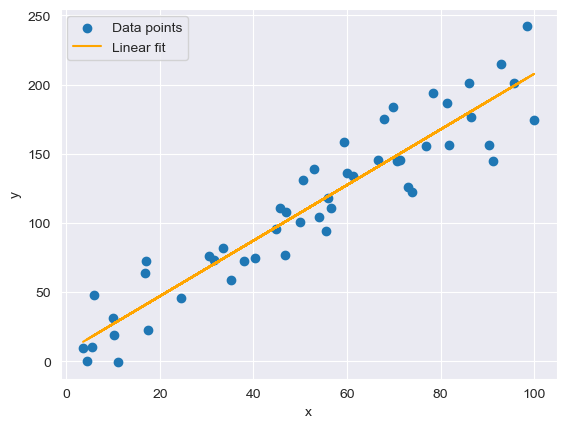

In [50]:
# 2: Plot the scatter plot and the fitted line.

plt.scatter(x, y, label='Data points')
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x, model.predict(x_with_const), color='orange', label='Linear fit')
plt.legend()
plt.show()

In [51]:
# 3: Calculate correlation and R^2.

from scipy.stats import pearsonr

# Pearson correlation
correlation, _ = pearsonr(x, y)
print(f"Pearson correlation: {correlation:.4f}")

# R^2
r_squared = correlation**2
print(f"R^2: {r_squared:.4f}")

Pearson correlation: 0.9400
R^2: 0.8836


In [52]:
# 4: Run the summary() function and try to extract P-values for the model from the object returned by summary. See ?summary.lm.

print(model.pvalues)

[2.85509892e-01 4.65470278e-24]


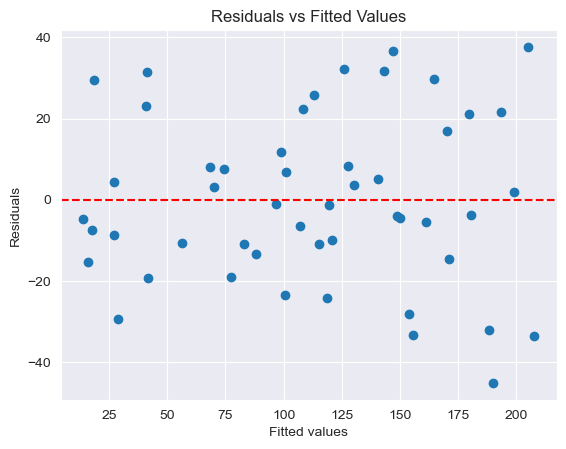

In [53]:
# 5: Plot the residuals vs. the fitted values plot, by calling the plot() function with which=1 as the second argument. First argument is the model returned by lm().

fitted_values = model.fittedvalues
residuals = model.resid

plt.scatter(fitted_values, residuals)
plt.axhline(y=0, color='red', linestyle='--')  # Add a horizontal line at 0
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

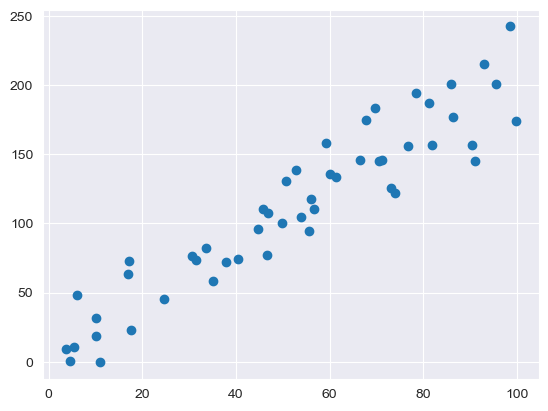

In [54]:
# 6: For the next exercises, read the data set histone modification data set. Use the following to get the path to the file: There are 3 columns in the dataset. These are measured levels of H3K4me3, H3K27me3 and gene expression per gene. Once you read in the data, plot the scatter plot for H3K4me3 vs. expression.

np.random.seed(32)
x = np.random.uniform(1, 100, 50)
eps1 = np.random.normal(0, 20, 50)
eps2 = np.random.normal(0, 10, 50)
y1 = 10 + 2 * x + eps1
y2 = 3 * x + eps2

histone_mod = pd.DataFrame(np.array([y1, y2, x]).T, columns=['H3K4me3', 'H3K27me3', 'gene_expression'])

plt.scatter(histone_mod['gene_expression'], histone_mod['H3K4me3'])
plt.show()

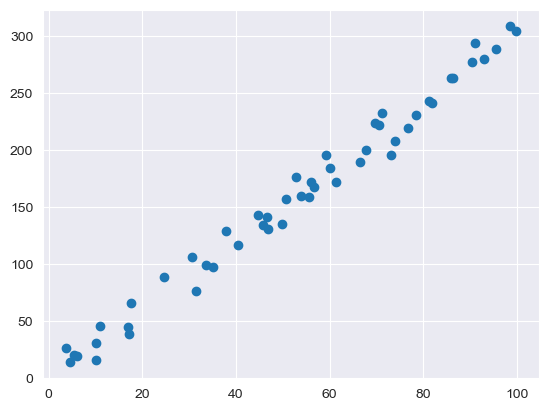

In [55]:
# 7: Plot the scatter plot for H3K27me3 vs. expression.

plt.scatter(histone_mod['gene_expression'], histone_mod['H3K27me3'])
plt.show()

In [56]:
# 8: Fit the model for prediction of expression data using: 1) Only H3K4me3 as explanatory variable, 2) Only H3K27me3 as explanatory variable, and 3) Using both H3K4me3 and H3K27me3 as explanatory variables. Inspect the summary() function output in each case, which terms are significant.

import statsmodels.api as sm

# Only H3K4me3 as explanatory variable
print('H3K4me3:')
x_with_const = sm.add_constant(histone_mod['gene_expression']) 
model1 = sm.OLS(histone_mod['H3K4me3'], x_with_const).fit()
print(model1.summary())

print('----------')

# Only H3K27me3 as explanatory variable
print('H3K27me3:')
x_with_const = sm.add_constant(histone_mod['gene_expression'])
model2 = sm.OLS(histone_mod['H3K27me3'], x_with_const).fit()
print(model2.summary())

H3K4me3:
                            OLS Regression Results                            
Dep. Variable:                H3K4me3   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     364.4
Date:                Tue, 26 Nov 2024   Prob (F-statistic):           4.65e-24
Time:                        10:16:51   Log-Likelihood:                -222.04
No. Observations:                  50   AIC:                             448.1
Df Residuals:                      48   BIC:                             451.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               6.7833      6

In [57]:
# Both H3K4me3 and H3K27me3 as explanatory variables (multivariate regression model)
# Multivariate Analysis of Variance (MANOVA) in statsmodels
# or: LinearRegression in sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy import stats

X = np.column_stack([histone_mod['gene_expression'], histone_mod['gene_expression']])
Y = np.column_stack([histone_mod['H3K4me3'], histone_mod['H3K27me3']])
model = LinearRegression()
model.fit(X, Y)
print("Model Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

## Calculate the p-values for the coefficients
#residuals = Y - model.predict(X)
#mse = mean_squared_error(Y, model.predict(X))
#X_with_intercept = np.column_stack([np.ones(X.shape[0]), X])
#cov_matrix = np.linalg.inv(np.dot(X_with_intercept.T, X_with_intercept))
#stderr = np.sqrt(np.diagonal(cov_matrix) * mse)
#
## Calculate p-values for each coefficient
#t_stat = model.coef_ / stderr
#p_values = 2 * (1 - stats.t.cdf(np.abs(t_stat), df=X.shape[0] - X.shape[1] - 1))
#print("Standard Errors for each coefficient:", stderr)
#print("T-statistics for each coefficient:", t_stat)
#print("P-values for each coefficient:", p_values)

Model Coefficients: [[1.0052498  1.0052498 ]
 [1.50530847 1.50530847]]
Intercept: [6.78329264 0.42644162]


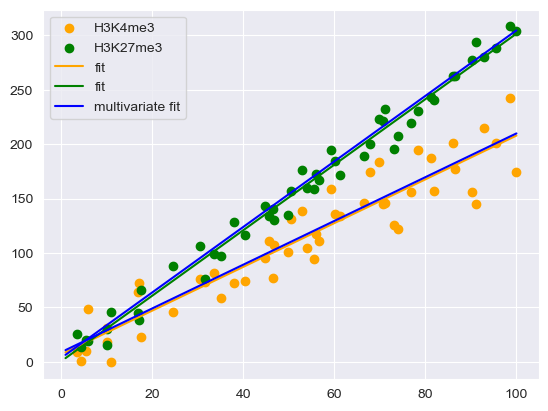

In [58]:
# 9: Is using H3K4me3 and H3K27me3 better than the model with only H3K4me3?

plt.scatter(histone_mod['gene_expression'], histone_mod['H3K4me3'], label='H3K4me3', c='orange')
plt.scatter(histone_mod['gene_expression'], histone_mod['H3K27me3'], label='H3K27me3', c='green')

x = np.linspace(1, 100, 50)

# Fitting with only one explanatory variable
y_H3K4me3 = 2.0105 * x + 6.7833
y_H3K27me3 = 3.0106 * x + 0.4264

# Fitting parameters for multivariate
y1 = 1.0052498 * 2 + 1.0052498 * 2 * x + 6.78329264
y2 = 1.50530847 * 2 + 1.50530847 * 2 * x + 0.42644162

plt.plot(x, y_H3K4me3, c='orange', label='fit')
plt.plot(x, y_H3K27me3, c='green', label='fit')
plt.plot(x, y1, c='blue', label='multivariate fit')
plt.plot(x, y2, c='blue')

plt.legend()
plt.show()